In [1]:
#Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Đọc file CSV
file_path = "historical_air_quality_2021_en.csv"  # Thay bằng đường dẫn file CSV
data = pd.read_csv(file_path)
# Loại bỏ các dòng hoàn toàn trống
data = data.dropna(how="all")
print("Kiểu dữ liệu ban đầu của các cột:")
print(data.dtypes)
# Chuyển đổi các giá trị đặc biệt thành NaN
data.replace(["-", "", "#NAME?"], pd.NA, inplace=True)

Kiểu dữ liệu ban đầu của các cột:
Station ID            float64
AQI index              object
Location               object
Station name           object
Url                    object
Dominent pollutant     object
CO                     object
Dew                   float64
Humidity              float64
NO2                    object
O3                     object
Pressure               object
PM10                   object
PM2.5                  object
SO2                    object
Temperature           float64
Wind                  float64
Data Time S            object
Data Time Tz           object
Status                 object
Alert level            object
dtype: object


In [3]:
# Kiểm tra dữ liệu bị khuyết
missing_data = data.isnull().sum()
print("Số lượng giá trị khuyết trong mỗi cột:")
print(missing_data)

# Tính tỷ lệ phần trăm dữ liệu bị khuyết
missing_percentage = (missing_data / len(data)) * 100
print("\nTỷ lệ phần trăm dữ liệu khuyết:")
print(missing_percentage)

Số lượng giá trị khuyết trong mỗi cột:
Station ID               0
AQI index              521
Location                 0
Station name             0
Url                      0
Dominent pollutant     508
CO                     467
Dew                    359
Humidity                14
NO2                    630
O3                    1395
Pressure                14
PM10                   734
PM2.5                  438
SO2                   1361
Temperature              7
Wind                     7
Data Time S              0
Data Time Tz             0
Status                2599
Alert level           2599
dtype: int64

Tỷ lệ phần trăm dữ liệu khuyết:
Station ID             0.000000
AQI index             19.870328
Location               0.000000
Station name           0.000000
Url                    0.000000
Dominent pollutant    19.374523
CO                    17.810831
Dew                   13.691838
Humidity               0.533944
NO2                   24.027460
O3                    53.203

In [4]:
# Xử lý dữ liệu khuyết
# Loại bỏ các cột có trên 20% giá trị khuyết
threshold = 30  # Ngưỡng phần trăm
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)
print(f"\nCác cột bị loại bỏ do quá nhiều giá trị khuyết: {columns_to_drop.tolist()}")


Các cột bị loại bỏ do quá nhiều giá trị khuyết: ['O3', 'SO2', 'Status', 'Alert level']


In [5]:
# Chuyển đổi các giá trị sai về đúng định dạng (Tiền xử lý dữ liệu)
data_cleaned["Data Time S"] = pd.to_datetime(data_cleaned['Data Time S'])
data_cleaned["AQI index"] = pd.to_numeric(data_cleaned['AQI index'])
data_cleaned["Pressure"] = pd.to_numeric(data_cleaned['Pressure'].str.replace(',', ''))
data_cleaned["CO"] = pd.to_numeric(data_cleaned['CO'])
data_cleaned["NO2"] = pd.to_numeric(data_cleaned['NO2'])
data_cleaned["PM10"] = pd.to_numeric(data_cleaned['PM10'])
data_cleaned["PM2.5"] = pd.to_numeric(data_cleaned['PM2.5'])
print(data_cleaned.dtypes)

# Thay thế giá trị khuyết trong các cột còn lại
data_cleaned.fillna({
    "AQI index": data_cleaned["AQI index"].median(),  # Thay bằng giá trị trung vị
    "Humidity": data_cleaned["Humidity"].median(),
    "Pressure": data_cleaned["Pressure"].median(),
    "Temperature": data_cleaned["Temperature"].median(),
    "Wind": data_cleaned["Wind"].median(),
    "CO": data_cleaned["CO"].mean(),  # Thay bằng giá trị trung bình
    "Dew": data_cleaned["Dew"].mean(),
    "NO2": data_cleaned["NO2"].mean(),
    "PM10": data_cleaned["PM10"].mean(),
    "PM2.5": data_cleaned["PM2.5"].mean(),
    "Dominent pollutant": "Not Specified",
}, inplace=True)

# Kiểm tra lại dữ liệu sau khi xử lý
print("\nDữ liệu sau khi xử lý:")
print(data_cleaned.info())

Station ID                   float64
AQI index                    float64
Location                      object
Station name                  object
Url                           object
Dominent pollutant            object
CO                           float64
Dew                          float64
Humidity                     float64
NO2                          float64
Pressure                     float64
PM10                         float64
PM2.5                        float64
Temperature                  float64
Wind                         float64
Data Time S           datetime64[ns]
Data Time Tz                  object
dtype: object

Dữ liệu sau khi xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 2622 entries, 0 to 2621
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Station ID          2622 non-null   float64       
 1   AQI index           2622 non-null   float64       
 2   Lo

In [6]:
# Lưu dữ liệu đã xử lý vào file mới
data_cleaned.to_csv("cleaned_air_quality_data.csv", index=False, encoding = 'utf-8')
print("Dữ liệu sạch đã được lưu vào 'cleaned_air_quality_data.csv'")
print(data_cleaned)
#Tóm lược dữ liệu
descriptive_stats = data_cleaned[['AQI index', 'CO', 'Dew', 'Humidity', 'NO2', 'Pressure', 'PM10', 'PM2.5', 'Temperature', 'Wind']].describe(percentiles=[0.25, 0.5, 0.75])
print(descriptive_stats)

Dữ liệu sạch đã được lưu vào 'cleaned_air_quality_data.csv'
      Station ID  AQI index                Location  \
0         8767.0      102.0    10.782978,106.700711   
1         8688.0      221.0  21.0811211,105.8180306   
2         8641.0      281.0  21.0215063,105.8188748   
3        13012.0       36.0    13.998599,107.996482   
4        12488.0       68.0     16.46226,107.596351   
...          ...        ...                     ...   
2617     13017.0      168.0      21.02022,105.81232   
2618     13020.0       58.0      21.00577,105.74842   
2619     13013.0      162.0      21.05121,105.78232   
2620     13014.0      149.0       21.0072,105.83572   
2621     13252.0      114.0         22.6782,106.245   

                                           Station name  \
0     Ho Chi Minh City US Consulate, Vietnam (Lãnh s...   
1     United Nations International School of Hanoi, ...   
2     Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...   
3           Gia Lai/phường Thống Nhất - Ple

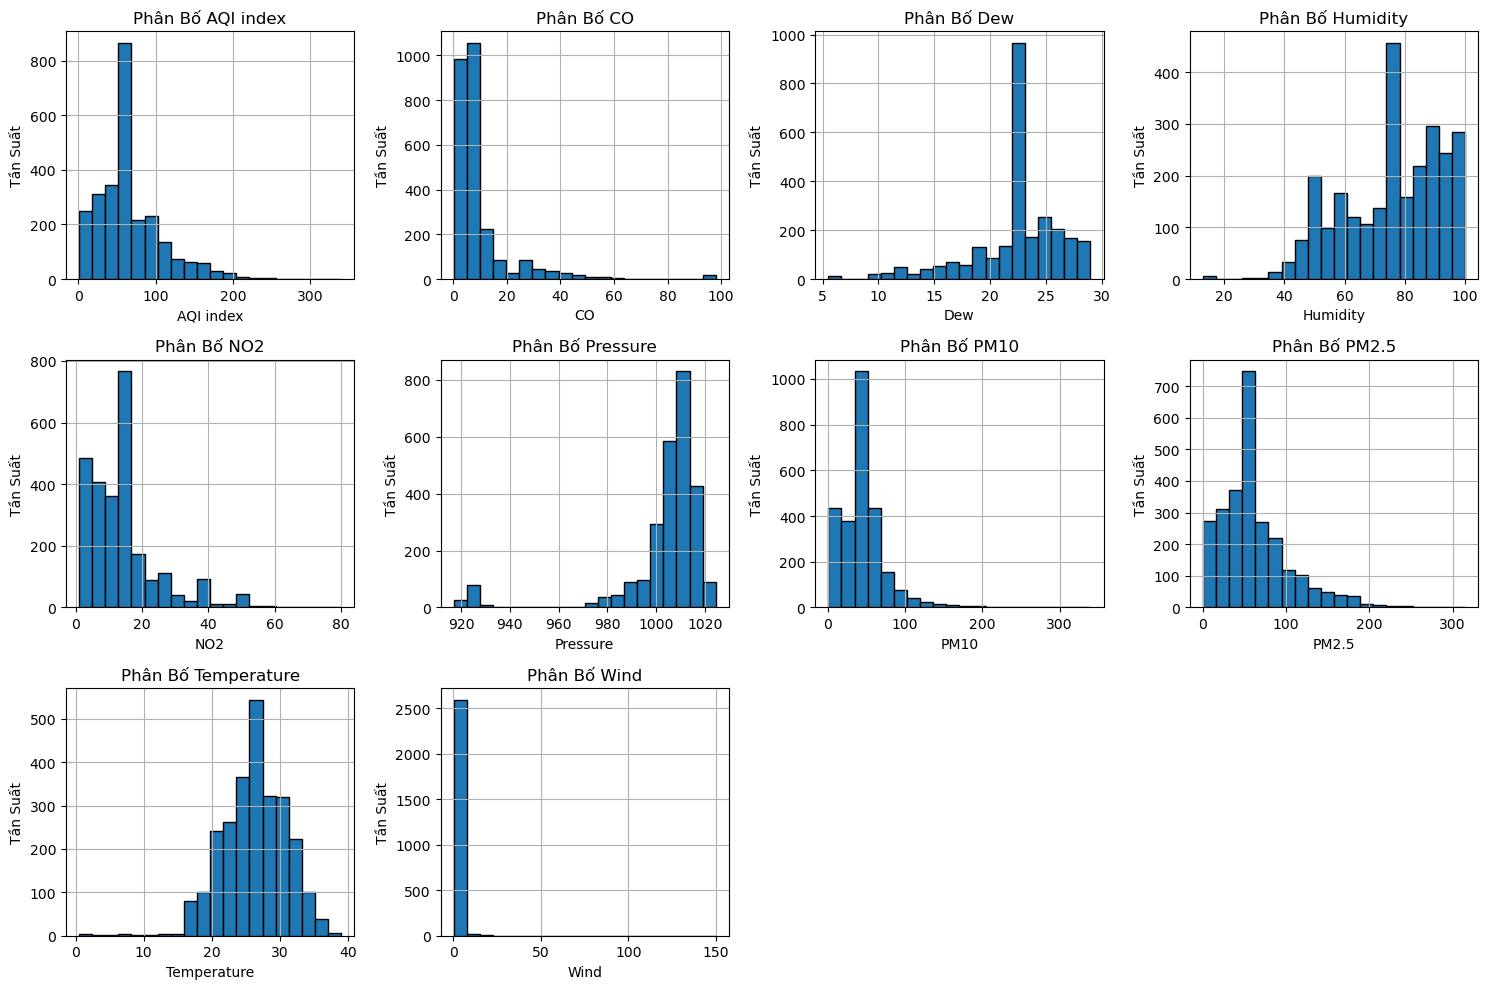

In [7]:
# Chọn các cột số để phân tích
numeric_columns = ['AQI index', 'CO', 'Dew', 'Humidity', 'NO2', 
                  'Pressure', 'PM10', 'PM2.5', 'Temperature', 'Wind']

# 1. Phân tích mô tả đơn biến
plt.figure(figsize=(15,10))

# Histogram cho từng biến
for i, col in enumerate(numeric_columns, 1):
   plt.subplot(3, 4, i)
   data_cleaned[col].hist(bins=20, edgecolor='black')
   plt.title(f'Phân Bố {col}')
   plt.xlabel(col)
   plt.ylabel('Tần Suất')

plt.tight_layout()
plt.show()

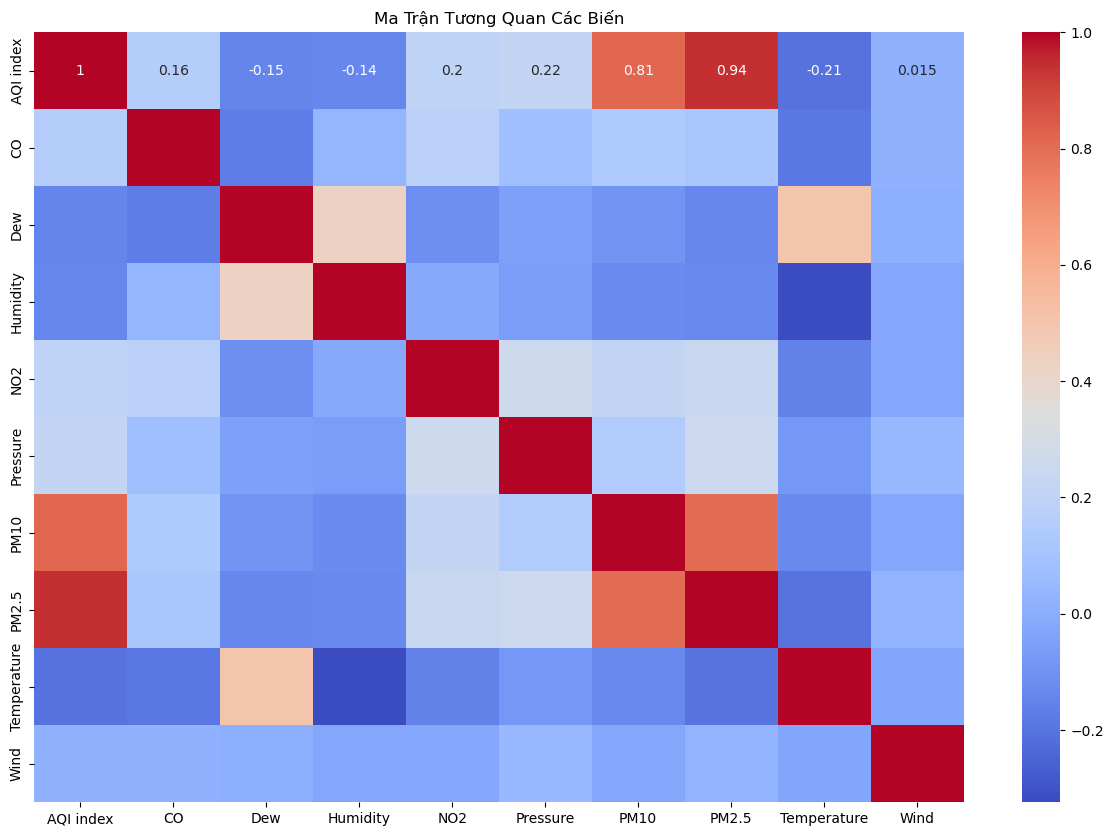

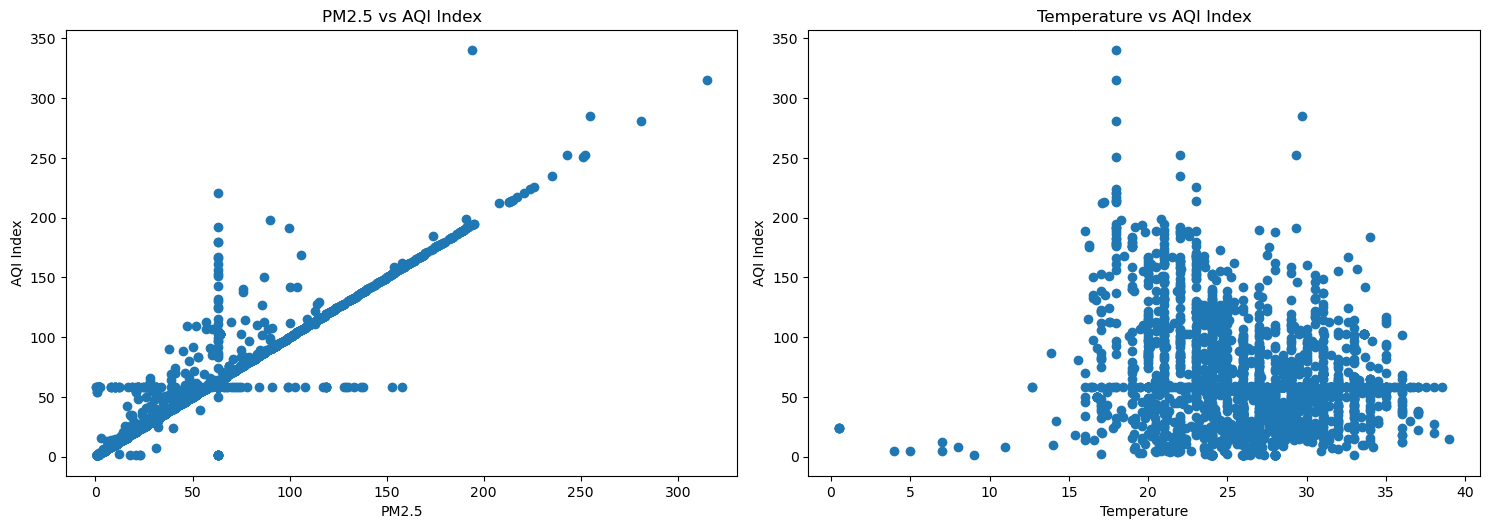

In [8]:
# 2. Phân tích đa biến
plt.figure(figsize=(15,10))

# Ma trận tương quan
correlation_matrix = data_cleaned[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma Trận Tương Quan Các Biến')
plt.show()

# Biểu đồ phân tán 2 chiều
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(data_cleaned['PM2.5'], data_cleaned['AQI index'])
plt.title('PM2.5 vs AQI Index')
plt.xlabel('PM2.5')
plt.ylabel('AQI Index')

plt.subplot(2,2,2)
plt.scatter(data_cleaned['Temperature'], data_cleaned['AQI index'])
plt.title('Temperature vs AQI Index')
plt.xlabel('Temperature')
plt.ylabel('AQI Index')

plt.tight_layout()
plt.show()

In [9]:
# 3. Thống kê mô tả
descriptive_stats = data_cleaned[numeric_columns].describe()
print("Thống kê mô tả:\n", descriptive_stats)

# 4. Phân tích theo nhóm
grouped_stats = data_cleaned.groupby('Station name')[numeric_columns].mean()
print("\nThống kê theo địa điểm:\n", grouped_stats)

Thống kê mô tả:
          AQI index           CO         Dew     Humidity          NO2  \
count  2622.000000  2622.000000  2622.00000  2622.000000  2622.000000   
mean     64.922197     9.613503    22.24821    75.802326    13.500853   
std      42.223466    12.489086     3.95461    16.426274    10.660291   
min       1.000000     0.100000     5.50000    13.000000     1.000000   
25%      38.000000     3.000000    21.22500    63.000000     6.000000   
50%      58.000000     6.000000    22.24821    78.000000    13.500853   
75%      83.000000     9.613503    25.00000    88.500000    15.000000   
max     340.000000    98.000000    29.00000   100.000000    80.000000   

          Pressure         PM10        PM2.5  Temperature         Wind  
count  2622.000000  2622.000000  2622.000000  2622.000000  2622.000000  
mean   1003.534134    45.403390    63.240614    26.226430     2.921815  
std      19.037611    29.835458    41.719910     4.726886     3.881745  
min     916.900000     0.500000  